In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Heart.csv')
df

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0      2.3      3  0.0       fixed   No  
1        1      1.5      2  3.0      normal  Yes  
2        1      2.6      2  2.0  reversable  Yes  
3        0      3.5      3  0.0      normal   No  
4        0      1.4      1  0.0      normal   No  
..     ...      ...    ...  ...         ...  ...  
298      0      1.2      2  0.0  reversable  Yes  
299      0      3.4      2  2.0  reversable  Yes  
300      1      1.2      2  1.0  reversable  Yes  
301      0      0.0      2  1.0      normal  Yes  
302      0      0.0      1  NaN      normal   No  

[303 rows x 15 columns]

DATA CLEANING

In [3]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [4]:
df1 = df.fillna(method='bfill')
df1

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0      2.3      3  0.0       fixed   No  
1        1      1.5      2  3.0      normal  Yes  
2        1      2.6      2  2.0  reversable  Yes  
3        0      3.5      3  0.0      normal   No  
4        0      1.4      1  0.0      normal   No  
..     ...      ...    ...  ...         ...  ...  
298      0      1.2      2  0.0  reversable  Yes  
299      0      3.4      2  2.0  reversable  Yes  
300      1      1.2      2  1.0  reversable  Yes  
301      0      0.0      2  1.0      normal  Yes  
302      0      0.0      1  NaN      normal   No  

[303 rows x 15 columns]

DATA INTEGRATION

In [5]:
df2 = df1[['Age','Sex','RestBP','MaxHR']].loc[0:50]
df2.head()

Age  Sex  RestBP  MaxHR
0   63    1     145    150
1   67    1     160    108
2   67    1     120    129
3   37    1     130    187
4   41    0     130    172

In [6]:
df3 = df1[['Age','Sex','Oldpeak','Chol','Ca']].loc[50:100]
df3.head()

Age  Sex  Oldpeak  Chol   Ca
50   41    0      0.0   198  1.0
51   65    1      0.4   177  0.0
52   44    1      0.0   290  1.0
53   44    1      0.0   219  0.0
54   60    1      1.4   253  1.0

In [7]:
df4 = df1[['Age','Sex','RestECG','Thal']].loc[100:150]
df4.head()

Age  Sex  RestECG        Thal
100   45    1        2      normal
101   34    1        2      normal
102   57    0        2      normal
103   71    0        2      normal
104   49    1        0  reversable

VISUALIZATION

[]

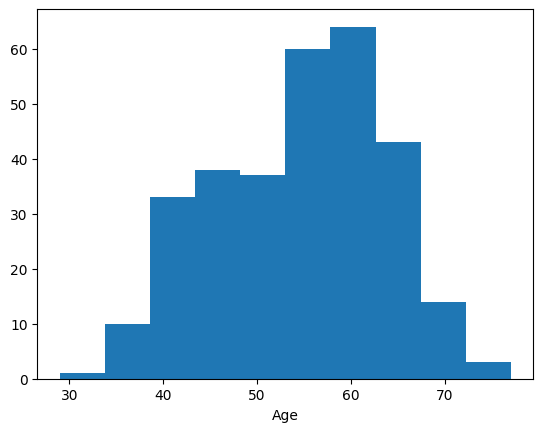

In [8]:
plt.hist(df1['Age'])
plt.xlabel('Age')
plt.plot()

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

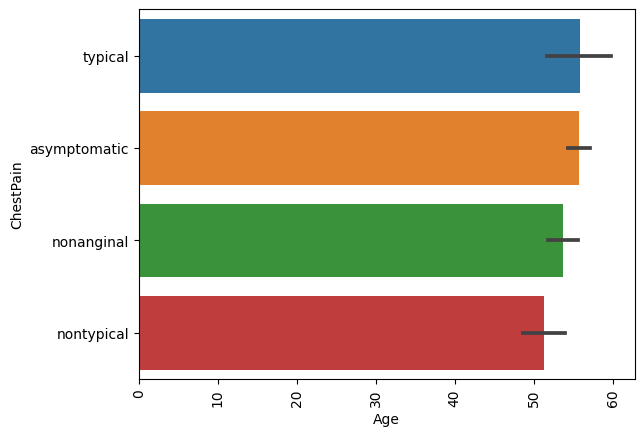

In [9]:
sb.barplot(data=df1,x="Age",y="ChestPain")
plt.xticks(rotation=90)

<AxesSubplot: xlabel='MaxHR', ylabel='Chol'>

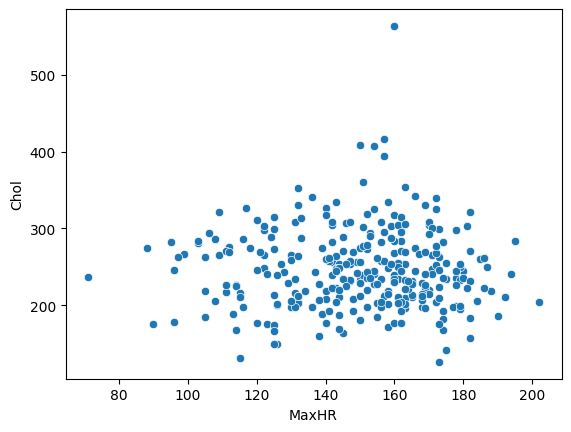

In [10]:
sb.scatterplot(data=df1,x="MaxHR",y="Chol")

<AxesSubplot: xlabel='Age', ylabel='Chol'>

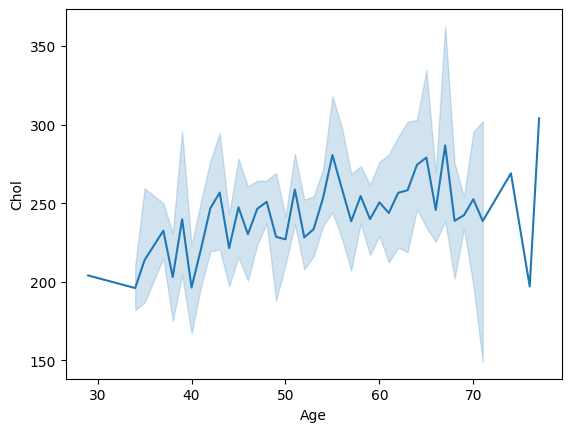

In [11]:
sb.lineplot(data=df1,x="Age",y="Chol")

<AxesSubplot: xlabel='Chol', ylabel='Thal'>

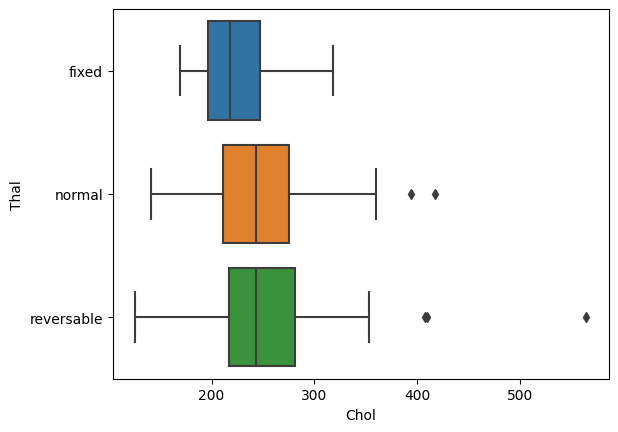

In [12]:
sb.boxplot(data=df1,x="Chol",y="Thal")

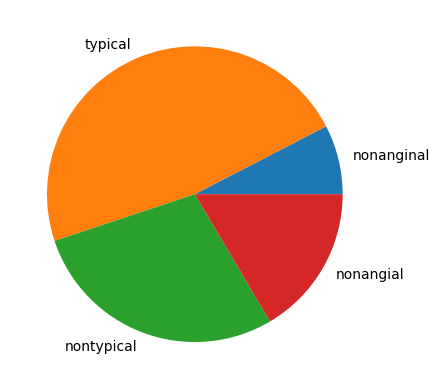

In [13]:
data = [df1.ChestPain[df1.ChestPain == "typical"].count(),df1.ChestPain[df1.ChestPain == "asymptomatic"].count(),
       df1.ChestPain[df1.ChestPain == "nonanginal"].count(),df1.ChestPain[df1.ChestPain == "nontypical"].count()]
labels = ["nonanginal","typical","nontypical","nonangial"]
plt.pie(data,labels=labels)
plt.show()